# RandomForest

### Mix

In [1]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv('./data/etrain.csv')
test = pd.read_csv('./data/etest.csv')
validation = pd.read_csv('./data/evalidation.csv')
class_list = np.load('./class_list.npy')


train_target = train['target']
train = train.drop(columns = ['target'])

test_target = test['target']
test = test.drop(columns = ['target'])

validation_target = validation['target']
validation = validation.drop(columns = ['target'])

selected_feature = np.load('./selected_features.npy', allow_pickle=True)
train = train[selected_feature]
test = test[selected_feature]
validation =  validation[selected_feature]

In [2]:
classifier = RandomForestClassifier()

param_dist = {
    'max_depth': range(3, 100),
    'n_estimators': range(10, 100),
    "max_features": range(1, 60),
}

tree_cv = RandomizedSearchCV(classifier, param_dist, cv=5, n_iter=30, n_jobs=-1)

tree_cv.fit(train, train_target)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [3]:
print("Tuned Random Forest Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Random Forest Parameters: {'n_estimators': 96, 'max_features': 38, 'max_depth': 41}
Best score is 0.7589510764078662


In [4]:
predict_target = tree_cv.predict(test)
validation_predict_target = tree_cv.predict(validation)
print(tree_cv.score(test, test_target))
print(tree_cv.score(validation, validation_target))
print(classification_report(test_target, predict_target))
print(classification_report(validation_target, validation_predict_target))

0.7038151402094115
0.6467579359109372
              precision    recall  f1-score   support

           0       0.86      0.70      0.77      2051
           1       0.57      0.62      0.59      2090
           2       0.62      0.62      0.62      2110
           3       0.80      0.88      0.84      2058

    accuracy                           0.70      8309
   macro avg       0.71      0.70      0.71      8309
weighted avg       0.71      0.70      0.70      8309

              precision    recall  f1-score   support

           0       0.87      0.61      0.72      1688
           1       0.53      0.49      0.51      1709
           2       0.49      0.58      0.53      1588
           3       0.75      0.91      0.83      1662

    accuracy                           0.65      6647
   macro avg       0.66      0.65      0.65      6647
weighted avg       0.66      0.65      0.65      6647



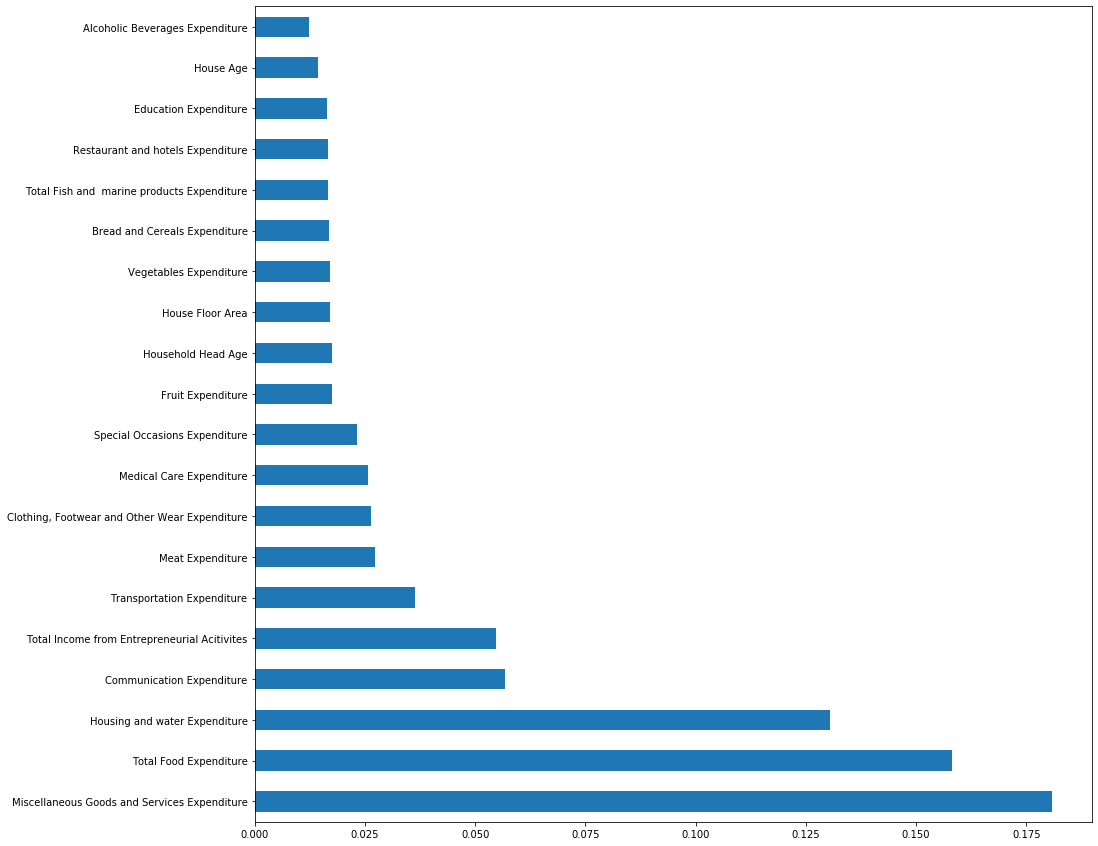

In [5]:
feat_importances = pd.Series(tree_cv.best_estimator_.feature_importances_, index=train.columns)
plt.figure(figsize=(15, 15))
f = feat_importances.nlargest(20)
f.plot(kind='barh')
plt.show()

### Only numeric feature

In [6]:
train = pd.read_csv('./data/etrain.csv')
test = pd.read_csv('./data/etest.csv')
validation = pd.read_csv('./data/evalidation.csv')
class_list = np.load('./class_list.npy')

train_target = train['target']
train = train.drop(columns = ['target'])
test_target = test['target']
test = test.drop(columns = ['target'])


train = pd.read_csv('./data/etrain.csv')
test = pd.read_csv('./data/etest.csv')
validation = pd.read_csv('./data/evalidation.csv')
numeric_feature = np.load('./numeric_features.npy')

#train_target = train['target']
#train = train.drop(columns = ['target'])
#test_target = test['target']
#test = test.drop(columns = ['target'])
train = train[numeric_feature]
test = test[numeric_feature]
validation = validation[numeric_feature]

In [7]:
classifier = RandomForestClassifier()

param_dist = {
    'max_depth': range(3, 100),
    'n_estimators': range(10, 100),
    "max_features": range(1, 60),
}

tree_cv = RandomizedSearchCV(classifier, param_dist, cv=5, n_iter=30, n_jobs=-1)

tree_cv.fit(train, train_target)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [8]:
print("Tuned Random Forest Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Random Forest Parameters: {'n_estimators': 93, 'max_features': 22, 'max_depth': 56}
Best score is 0.7576348628223012


In [9]:
predict_target = tree_cv.predict(test)
print(tree_cv.score(test, test_target))
print(classification_report(test_target, predict_target))

0.7109158743531111
              precision    recall  f1-score   support

           0       0.85      0.71      0.77      2051
           1       0.58      0.63      0.60      2090
           2       0.63      0.63      0.63      2110
           3       0.81      0.88      0.84      2058

    accuracy                           0.71      8309
   macro avg       0.72      0.71      0.71      8309
weighted avg       0.72      0.71      0.71      8309



### Only Categorical

In [10]:
train = pd.read_csv('./data/etrain.csv')
test = pd.read_csv('./data/etest.csv')
validation = pd.read_csv('./data/evalidation.csv')
numeric_feature = np.load('./numeric_features.npy')

train_target = train['target']
train = train.drop(columns = ['target'])
test_target = test['target']
test = test.drop(columns = ['target'])

train = train.drop(columns=numeric_feature)
test = test.drop(columns=numeric_feature)
validation = validation.drop(columns=numeric_feature)

In [11]:
classifier = RandomForestClassifier()

param_dist = {
    'max_depth': range(3, 100),
    'n_estimators': range(10, 100),
    "max_features": range(1, 60),
}

tree_cv = RandomizedSearchCV(classifier, param_dist, cv=5, n_iter=30, n_jobs=-1)

tree_cv.fit(train, train_target)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [12]:
print("Tuned Random Forest Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Random Forest Parameters: {'n_estimators': 67, 'max_features': 4, 'max_depth': 19}
Best score is 0.48627182546096126


In [13]:
predict_target = tree_cv.predict(test)
print(tree_cv.score(test, test_target))
print(classification_report(test_target, predict_target))

0.4830906246239018
              precision    recall  f1-score   support

           0       0.55      0.64      0.59      2051
           1       0.38      0.26      0.31      2090
           2       0.37      0.27      0.32      2110
           3       0.53      0.77      0.63      2058

    accuracy                           0.48      8309
   macro avg       0.46      0.49      0.46      8309
weighted avg       0.46      0.48      0.46      8309



### aaaaaaaaaaa

In [ ]:
forest = RandomForestClassifier(n_jobs=-1)
forest.fit(train, train_target)

In [ ]:
predict_target = forest.predict(test)
print(forest.score(test, test_target))
print(classification_report(test_target, predict_target))